# Sample Midterm Economic Modeling and Simulation

* Important: the midterm is different from the sample in significant ways, so if you just copy-paste the code your solutions will be most likely wrong and your grade will be penalized. If I detect errors that show that you have __copied from another classmate, your grade will me penalized__ even more.

* The maximum score is 100 points, and you can get an additional 15 pts if your code is __particulary clean and original__; in other words, you can score less than 100 point in the exercises and still get a 100.

* This exam is __open-book__: you may also lookup on the internet as long as you do not communicate with your classmates or anyone else.

* The total amount of points is 100, but you can get up to 15 bonus points if your code is clean and/or elegant. In other words, you do not need to get everything right to get the maximum grade. However, it is __critical that the code runs__ and that there are no execution errors: a code that runs but that misses some calculations will be graded benevolently; a code that does not run will not.

* The midterm involves quite a lot of __plotting__; I have used the library `matplotlib.pyplot` extensively in the sample midterm because I find it easier for you to apply to time series, compared to `seaborn`. However, you are of course free to use `seaborn` if you prefer.

* For the exercises below you will need the following libraries, parameters, and code to create the path for the plots:


In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import statsmodels.formula.api as smf
import pmdarima as pm

from pathlib import Path

plt.style.use("seaborn-darkgrid")
matplotlib.rcParams["axes.labelsize"] = 14
matplotlib.rcParams["xtick.labelsize"] = 12
matplotlib.rcParams["ytick.labelsize"] = 12
matplotlib.rcParams["text.color"] = "k"
matplotlib.rcParams["figure.dpi"] = 200

directory = "plots"
Path(directory).mkdir(parents=True, exist_ok=True)


/tmp/ipykernel_2814/2101102020.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


## Exercise 1: exploratory analysis and OLS [40 pts]

(a) [5 pts] Load the dataset `car_crashes` from `seaborn`. Print it and print the name of its columns. It contains the number of people involved in car crashes per billion miles, and the percentage of those people who were "speeding", under the effects of "alcohol", and so on. Each row represents a state in the US.


In [26]:
sns.get_dataset_names()
df = sns.load_dataset(
    "car_crashes"
)  # total per billions miles, next four columns are %
print(df)
df.columns

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')


(b) [5 pts] Create a new column called `n_speeding` that contains the number of people (not the percentage) per billion miles who were speeding. 

In [27]:
df["n_speeding"] = df["total"] * df["speeding"] / 100

In [28]:
df.speeding.describe()

count    51.000000
mean      4.998196
std       2.017747
min       1.792000
25%       3.766500
50%       4.608000
75%       6.439000
max       9.450000
Name: speeding, dtype: float64


(c) [5 pts] Plot a histogram with the distribution of the percentages for `speeding` and for `alcohol`.

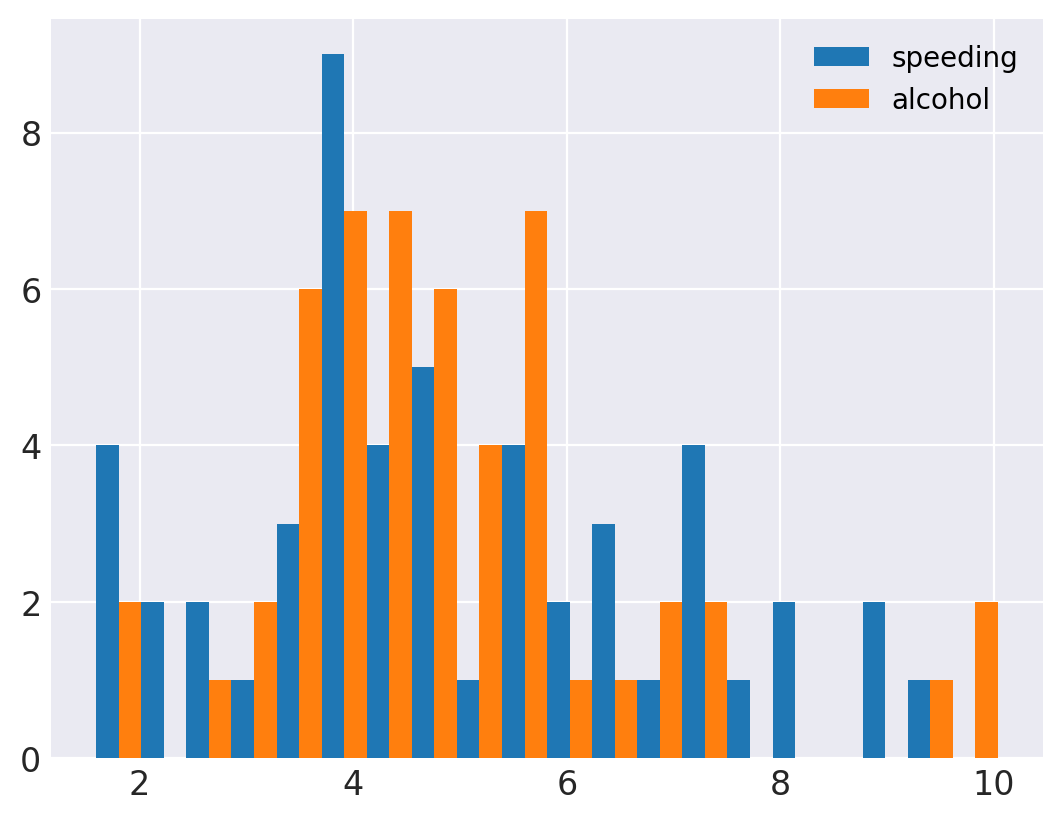

In [29]:
plt.hist(
    x=[df.speeding, df.alcohol],
    bins=20,
    label=["speeding", "alcohol"],
    #color=["red", "blue"],
    rwidth=1,
)
plt.legend()
plt.savefig(directory + "/hist_speeding.png")

(d) [5 pts] Define a `LeastSquares` function like the one we defined in class, that provides the intercept and slope after getting as arguments an `x` and `y` vectors.

In [30]:
def LeastSquares(xs, ys):
    mean_x = np.mean(xs)
    var_x = np.var(xs)
    mean_y = np.mean(ys)
    cov = np.dot(xs - mean_x, ys - mean_y) / len(xs)
    slope = cov / var_x
    inter = mean_y - slope * mean_x
    return inter, slope

(e) [5 pts] Apply the function to `alcohol` and `total`, in order to understand if there is a correlation between the percentage of drivers under the effects of `alcohol` and the total number of people involved in an accident.


(f) [5 pts] Build a column called `fit_alcohol` that contains the model fit for `total` for the datapoints in the dataset; do the same thing for `fit_speeding`.


In [31]:
inter, slope = LeastSquares(df.speeding, df.total)
print(f"Alcohol: {inter=}; {slope=}")
df["fit_speeding"] = inter + slope * df["speeding"]

inter, slope = LeastSquares(df.alcohol, df.total)
print(f"Speeding: {inter=}; {slope=}")
df["fit_alcohol"] = inter + slope * df["alcohol"]

Alcohol: inter=9.545877626552604; slope=1.249314423422635
Speeding: inter=5.857776154826299; slope=2.032506303932409



(g) [10 pts] Draw a scatterplot that includes `total` in the `y` axis, and `alcohol` and `speeding` in the `x` axis; plot both the actual dataset and your fits; for the fits, you do not need to use lines, you can use squared markers for simplicity.


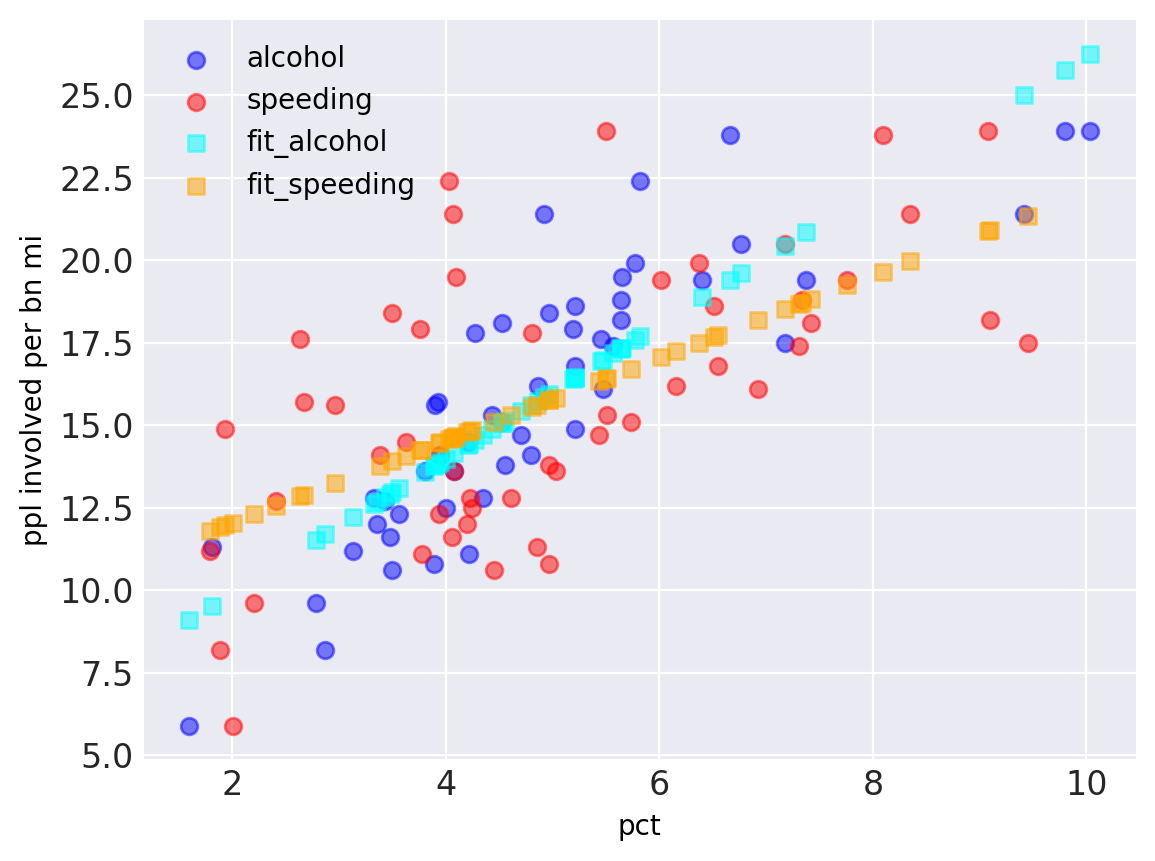

In [32]:
plt.scatter(x="alcohol", y="total", data=df, color="blue", label="alcohol", alpha=0.5)
plt.scatter(x="speeding", y="total", data=df, color="red", label="speeding", alpha=0.5)
plt.scatter(x="alcohol", y="fit_alcohol", data=df, color="cyan", marker="s", alpha=0.5)
plt.scatter(
    x="speeding", y="fit_speeding", data=df, color="orange", marker="s", alpha=0.5
)
plt.xlabel("pct")
plt.ylabel("ppl involved per bn mi")
plt.legend()
plt.savefig(f"{directory}/scatter.png")


## Exercise 2: logistic regression with statsmodels [25 pts]

(a) [5 pts] Load the `planets` dataset from `seaborn`.

In [33]:
planets = sns.load_dataset("planets")


(b) [5 pts] Create a new column called `twentyfirst_century` that is equal to `1` when the planet has been discovered in the 21st century and `0` otherwise.


In [34]:
planets["twentyfirst_century"] = (planets.year > 2000) * 1


(c) [5 pts] With `statsmodels`, build a logistic regression model that takes the orbital period, the mass, and the distance as regressors and predicts whether a planet was likely to be discovered in the 21st century (versus 20th century). Get the summary of the results of the model.


In [35]:
model = smf.logit(
    "twentyfirst_century ~ orbital_period + mass + distance", data=planets
)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.238201
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     twentyfirst_century   No. Observations:                  498
Model:                           Logit   Df Residuals:                      494
Method:                            MLE   Df Model:                            3
Date:                 Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1479
Time:                         16:18:24   Log-Likelihood:                -118.62
converged:                        True   LL-Null:                       -139.22
Covariance Type:             nonrobust   LLR p-value:                 5.969e-09
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9241      0.326      2.832      0.005       0.285       1.564
orbital_period     0.0005      0.000      2.104      0.035    3.44e-05       0.001
mass              -0.1531      0.041     -3.729      0.000      -0.234      -0.073
distance           0.0453      0.011      4.281      0.000       0.025       0.066
==================================================================================
"""


(d) [5 pts] Build a dataframe that contains data for a hypothetical new planet with orbital period of `100`, mass of `1`, and distance of `100`.


In [36]:
new_planet = pd.DataFrame(
    data={"orbital_period": [100], "mass": [1], "distance": [100]}
)


(e) [5 pts] Predict the chances that this planet has been discovered in the 21st century (versus in the 20th).


In [37]:
results.predict(new_planet)

0    0.995277
dtype: float64


## Exercise 3: time series [35 pts]

(a) [5 pts] Read the file `AirQualityUCI.csv`, which is in the `lesson/assets` folder. Specify that the separator is a semicolon.

In [38]:
air = pd.read_csv(".lesson/assets/AirQualityUCI.csv", sep=";")


(b) [5 pts] Transform the `Date` column into date format with the `to_datetime` command from `pandas`.


In [39]:
air["Date"] = pd.to_datetime(air["Date"])

/tmp/ipykernel_2814/984743988.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  air["Date"] = pd.to_datetime(air["Date"])



(c) [5 pts] Sort the values of the dataframe by date, and apply a filter to get only the datapoints with dates after "2004-04-01" and before "2004-12-31".


In [40]:
air = air.sort_values("Date").query('Date > "2004-04-01"').query('Date < "2004-12-31"')


(d) [5 pts] Create a copy of the dataframe and apply an exponential smoothing with span equal to 30 to the column `NOx(GT)`; you may overwrite the `NOx(GT)` column or create a new one.


In [41]:
smooth_air = air.copy()
smooth_air["NOx(GT)"] = air["NOx(GT)"].ewm(span=30).mean()


(e) [10 pts] Plot the original `NOx(GT)` column against the exponentially smoothed one, in different colors.


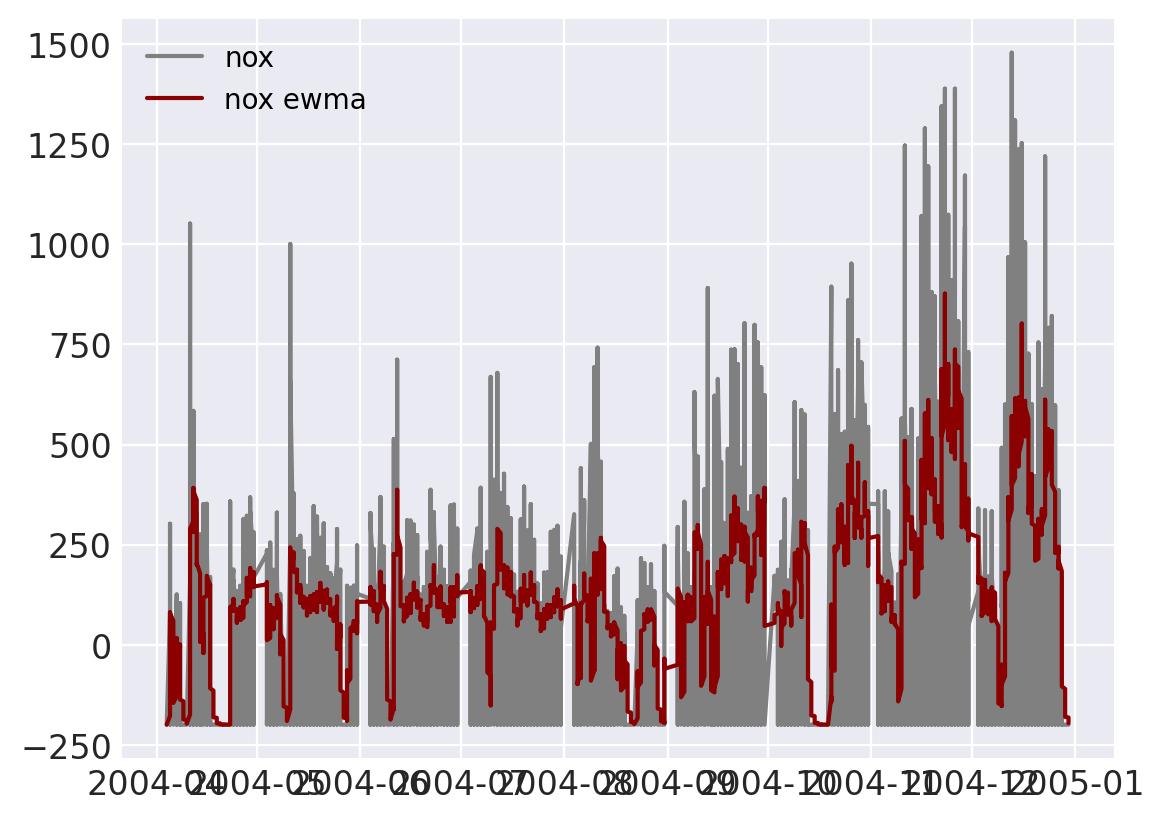

In [42]:
plt.plot(air["Date"], air["NOx(GT)"], label="nox", color="gray")
plt.plot(smooth_air["Date"], smooth_air["NOx(GT)"], label="nox ewma", color="darkred")
plt.legend()
plt.savefig("plots/ewma.png")


(f) [5 pts] Create a copy of the dataframe and apply a moving average with span equal to 30 to the column `NOx(GT)`; you may overwrite the `NOx(GT)` column or create a new one.

In [1]:
smooth_air = air.copy()
smooth_air["NOx(GT)"] = air["NOx(GT)"].rolling(window=30).mean()

NameError: name 'air' is not defined


(g) [10 pts] Plot the original `NOx(GT)` column against the exponentially smoothed one, in different colors.

/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_auto_solvers.py:324: UserWarning: early termination of stepwise search due to max_dur threshold (15.531 > 15.000)
  warnings.warn('early termination of stepwise search due to '


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5982
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -22166.760
Date:                Sun, 26 Feb 2023   AIC                          44347.519
Time:                        16:18:50   BIC                          44394.394
Sample:                             0   HQIC                         44363.800
                               - 5982                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3367      0.047     -7.165      0.000      -0.429      -0.245
ar.L2          0.5293      0.022     23.526      0.000       0.485       0.573
ar.L3          0.1495      0.013     11.763      0.0